In [9]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df = pd.read_csv("data_sets/merged_data.csv")
def preprocess(df):
    df2 = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0.2', 'name', 'Unnamed: 0' ])
    df_cleaned_columns = df2.dropna()
    return df_cleaned_columns
df_cleaned = preprocess(df)
df_cleaned 

,local_date_time_full,lat,lon,apparent_t,delta_t,gust_kmh,gust_kt,air_temp,dewpt,press,press_qnh,press_msl,rel_hum,wind_dir,wind_spd_kmh,wind_spd_kt,BPM2.5
0,05-13-16,-37.8,145.0,16.85,2.75,8.5,4.5,16.70,11.70,1022.05,1022.05,1022.05,72.5,"['CALM', 'S']",2.0,1.0,18.818
1,05-13-15,-37.8,145.0,16.15,3.15,12.0,6.5,17.15,11.30,1021.85,1021.85,1021.85,68.5,"['SSW', 'SSW']",7.5,4.0,15.612
2,05-13-14,-37.8,145.0,17.10,3.30,9.0,5.0,17.70,11.65,1021.50,1021.50,1021.50,68.0,"['S', 'SSE']",6.0,3.0,17.918
3,05-13-13,-37.8,145.0,13.40,1.70,19.5,10.5,14.95,11.80,1021.80,1021.80,1021.80,81.5,"['SSW', 'SSW']",11.0,6.0,14.764
5,05-13-12,-37.8,145.0,15.30,3.10,18.5,10.0,16.70,10.95,1021.90,1021.90,1021.90,69.0,"['SSW', 'SSW']",9.0,5.0,15.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,05-15-01,-37.8,145.0,8.10,0.40,5.5,3.0,9.10,8.25,1028.60,1028.60,1028.60,94.5,"['CALM', 'NNW']",3.0,1.5,2.258
102,05-15-00,-37.8,145.0,8.55,0.25,0.0,0.0,8.95,8.40,1028.90,1028.90,1028.90,96.5,"['CALM', 'CALM']",0.0,0.0,-0.054
103,05-14-23,-37.8,145.0,8.90,0.50,3.0,1.5,9.45,8.45,1029.35,1029.35,1029.35,93.5,"['CALM', 'NE']",1.0,0.5,6.154
104,05-14-22,-37.8,145.0,9.40,0.60,7.5,4.0,10.35,9.10,1029.65,1029.65,1029.65,92.0,"['NE', 'NNE']",4.0,2.0,6.131


##

In [11]:
df_cleaned.columns

Index(['local_date_time_full', 'lat', 'lon', 'apparent_t', 'delta_t',
       'gust_kmh', 'gust_kt', 'air_temp', 'dewpt', 'press', 'press_qnh',
       'press_msl', 'rel_hum', 'wind_dir', 'wind_spd_kmh', 'wind_spd_kt',
       'BPM2.5'],
      dtype='object')

In [12]:
# df_cleaned.set_index('local_date_time_full', inplace=True)

In [13]:
df_cleaned

,local_date_time_full,lat,lon,apparent_t,delta_t,gust_kmh,gust_kt,air_temp,dewpt,press,press_qnh,press_msl,rel_hum,wind_dir,wind_spd_kmh,wind_spd_kt,BPM2.5
0,05-13-16,-37.8,145.0,16.85,2.75,8.5,4.5,16.70,11.70,1022.05,1022.05,1022.05,72.5,"['CALM', 'S']",2.0,1.0,18.818
1,05-13-15,-37.8,145.0,16.15,3.15,12.0,6.5,17.15,11.30,1021.85,1021.85,1021.85,68.5,"['SSW', 'SSW']",7.5,4.0,15.612
2,05-13-14,-37.8,145.0,17.10,3.30,9.0,5.0,17.70,11.65,1021.50,1021.50,1021.50,68.0,"['S', 'SSE']",6.0,3.0,17.918
3,05-13-13,-37.8,145.0,13.40,1.70,19.5,10.5,14.95,11.80,1021.80,1021.80,1021.80,81.5,"['SSW', 'SSW']",11.0,6.0,14.764
5,05-13-12,-37.8,145.0,15.30,3.10,18.5,10.0,16.70,10.95,1021.90,1021.90,1021.90,69.0,"['SSW', 'SSW']",9.0,5.0,15.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,05-15-01,-37.8,145.0,8.10,0.40,5.5,3.0,9.10,8.25,1028.60,1028.60,1028.60,94.5,"['CALM', 'NNW']",3.0,1.5,2.258
102,05-15-00,-37.8,145.0,8.55,0.25,0.0,0.0,8.95,8.40,1028.90,1028.90,1028.90,96.5,"['CALM', 'CALM']",0.0,0.0,-0.054
103,05-14-23,-37.8,145.0,8.90,0.50,3.0,1.5,9.45,8.45,1029.35,1029.35,1029.35,93.5,"['CALM', 'NE']",1.0,0.5,6.154
104,05-14-22,-37.8,145.0,9.40,0.60,7.5,4.0,10.35,9.10,1029.65,1029.65,1029.65,92.0,"['NE', 'NNE']",4.0,2.0,6.131


## Preliminary leanring 

C:\Users\91891\AppData\Local\Temp\ipykernel_36392\1970302575.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['local_date_time_full'] = pd.to_datetime(df_cleaned['local_date_time_full'])


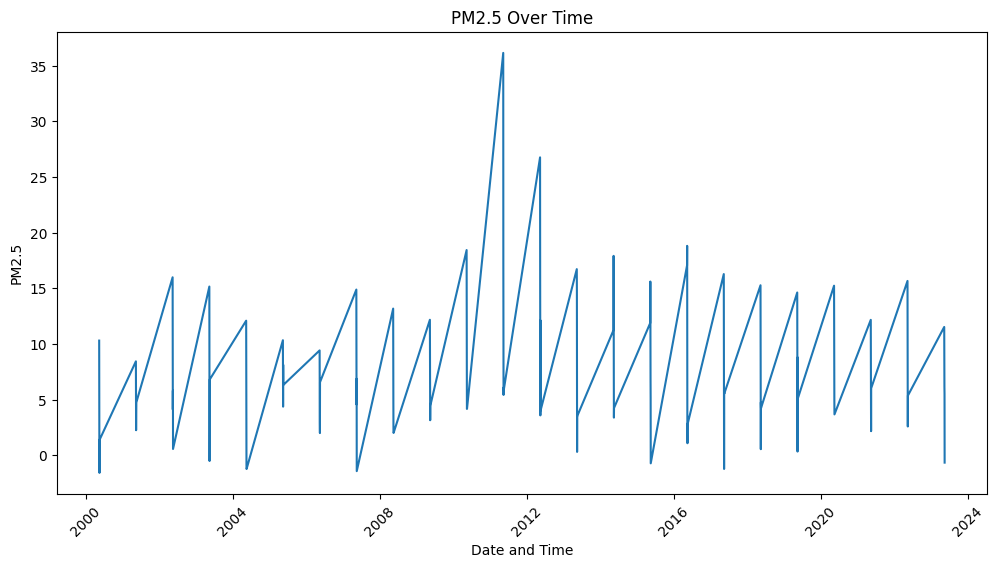

In [14]:
# 确保 'local_date_time_full' 是日期时间格式
df_cleaned['local_date_time_full'] = pd.to_datetime(df_cleaned['local_date_time_full'])

# 绘制 PM2.5 的折线图
plt.figure(figsize=(12, 6))
sns.lineplot(x='local_date_time_full', y='BPM2.5', data=df_cleaned)
plt.title('PM2.5 Over Time')
plt.xlabel('Date and Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()

In [15]:
# plt.figure(figsize=(20, 20))
# for i, col in enumerate(df.columns):
#     if col != 'BPM2.5':
#         plt.subplot(4, 4, i + 1)
#         sns.scatterplot(x=df[col], y=df['BPM2.5'])
#         plt.title(f'Scatter Plot of {col} vs BPM2.5')

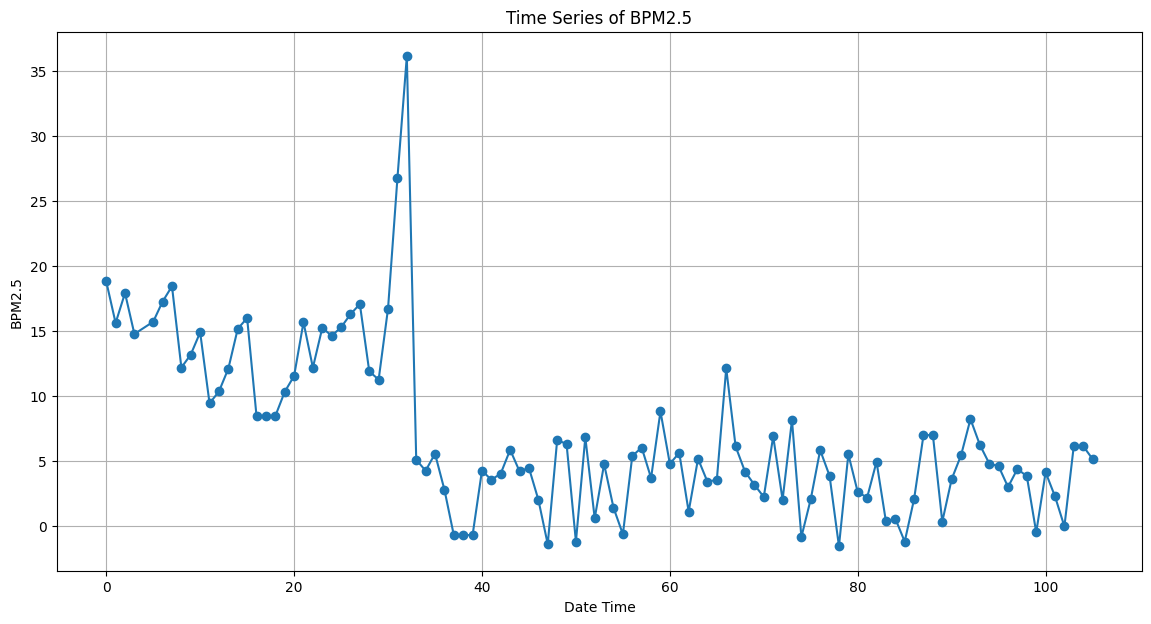

In [16]:
# df['local_date_time_full'] = pd.to_datetime(df['local_date_time_full'], format='%m-%d-%y')

# 设置时间列为索引


# 绘制时间序列图
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned.index, df_cleaned['BPM2.5'], marker='o')
plt.title('Time Series of BPM2.5')
plt.xlabel('Date Time')
plt.ylabel('BPM2.5')
plt.grid(True)
plt.show()



In [17]:
# 去除列名中的前后空格
df_cleaned.columns = df_cleaned.columns.str.strip()

# 再次打印列名，确认是否成功去除空格
print(df_cleaned.columns.tolist())

# 尝试删除 'wind_dir' 列
df_cleaned = df_cleaned.drop(columns=['wind_dir'])

['local_date_time_full', 'lat', 'lon', 'apparent_t', 'delta_t', 'gust_kmh', 'gust_kt', 'air_temp', 'dewpt', 'press', 'press_qnh', 'press_msl', 'rel_hum', 'wind_dir', 'wind_spd_kmh', 'wind_spd_kt', 'BPM2.5']


In [18]:
columns_to_keep = ['apparent_t', 'delta_t', 'gust_kmh', 'gust_kt', 'air_temp', 'dewpt', 'press', 'press_qnh', 'press_msl', 'rel_hum', 'wind_spd_kmh', 'wind_spd_kt', 'BPM2.5']

# 过滤掉不需要的列
filtered_df = df[columns_to_keep]

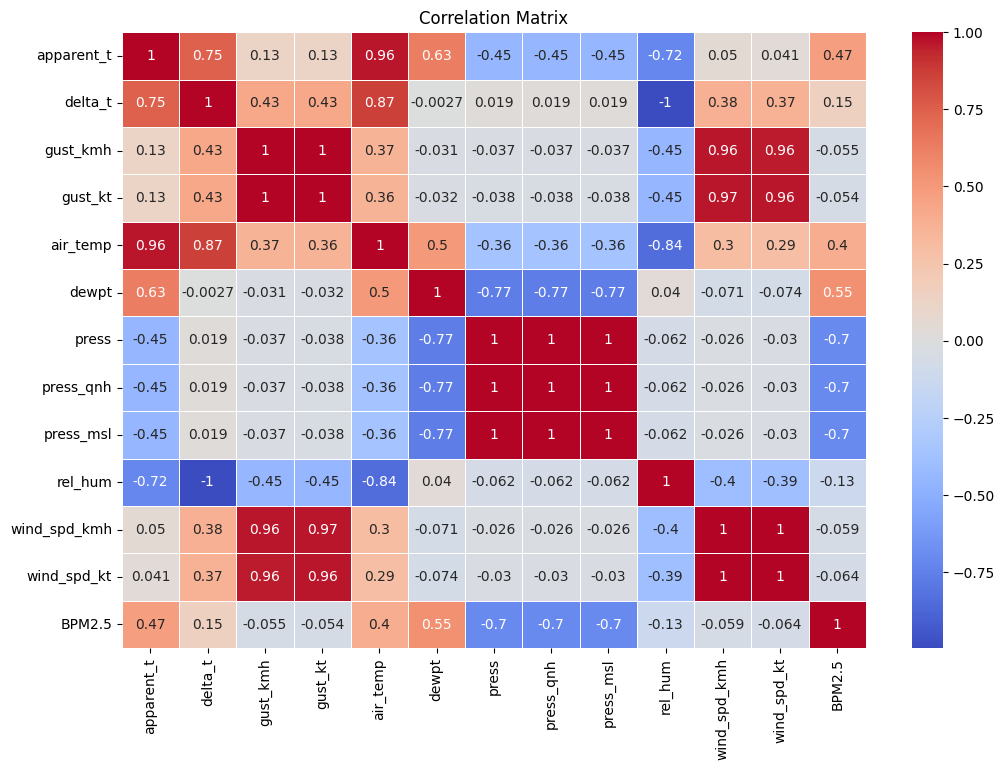

In [19]:
# 绘制相关矩阵图

plt.figure(figsize=(12, 8))
corr_matrix = filtered_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# # 绘制散点图矩阵
# sns.pairplot(filtered_df)
# plt.suptitle('Pairplot of All Features', y=1.02)
# plt.show()

## Build up model

In [21]:
X = df_cleaned.drop(columns=['BPM2.5', 'local_date_time_full'])  # 特征变量
y = df_cleaned['BPM2.5']  # 目标变量


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 55.994104075942914
R^2 Score: 0.31184904725044216
